In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# data preprocessing

In [5]:
# taking the main colunms
data = data[['v2', 'v1']]

#change the names of the colunms for better understanding
data=data.rename(columns={'v1':'label','v2':"text"})

In [6]:
data.head()

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [7]:
data.isna().any()

text     False
label    False
dtype: bool

In [8]:
data.duplicated().sum()

403

In [9]:
data=data.drop_duplicates(keep='first')

In [10]:
data.tail()

,text,label
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham
5571,Rofl. Its true to its name,ham


In [11]:
data.shape

(5169, 2)

In [12]:
# mapping the binary values in label using dictionary
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
data.tail(50)

,text,label
5517,Miles and smiles r made frm same letters but d...,0
5518,"By the way, i've put a skip right outside the ...",0
5519,Can you pls send me that company name. In saib...,0
5520,No. I dont want to hear anything,0
5521,You are a big chic. Common. Declare,0
5522,Thats cool. I want to please you...,0
5523,Going to join tomorrow.,0
5525,I want to tell you how bad I feel that basical...,0
5526,PRIVATE! Your 2003 Account Statement for shows...,1
5527,"Total disappointment, when I texted you was th...",0


In [13]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
X=data["text"]
y=data["label"]


In [15]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Create a TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)


In [17]:
# Create and train the logistic regression model
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [21]:
# Predict using the trained model
from sklearn.metrics import accuracy_score, classification_report

y_pred = logreg_model.predict(X_test_tfidf)

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9680851063829787
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



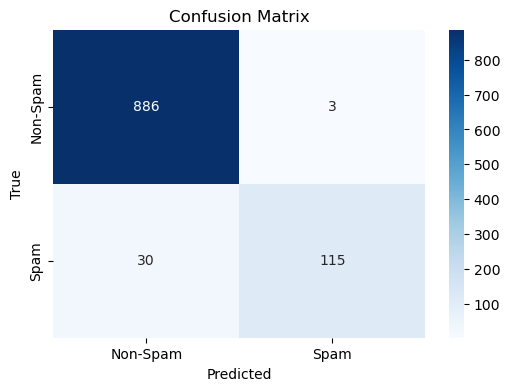

In [25]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
